In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Negara_HELP.csv')
# df.head()
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Penjelasan kolom fitur:

Negara : Nama negara

Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran

Ekspor : Ekspor barang dan jasa perkapita

Kesehatan: Total pengeluaran kesehatan perkapita

Impor: Impor barang dan jasa perkapita

Pendapatan: Penghasilan bersih perorang

Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP

Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup
jika pola kematian saat ini tetap sama

Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama

GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

In [ ]:
df.dtypes

Negara               object
Kematian_anak       float64
Ekspor              float64
Kesehatan           float64
Impor               float64
Pendapatan            int64
Inflasi             float64
Harapan_hidup       float64
Jumlah_fertiliti    float64
GDPperkapita          int64
dtype: object

In [ ]:
df.describe(include='all')

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [ ]:
# data numerical

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# data kategorikal
cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,Negara
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


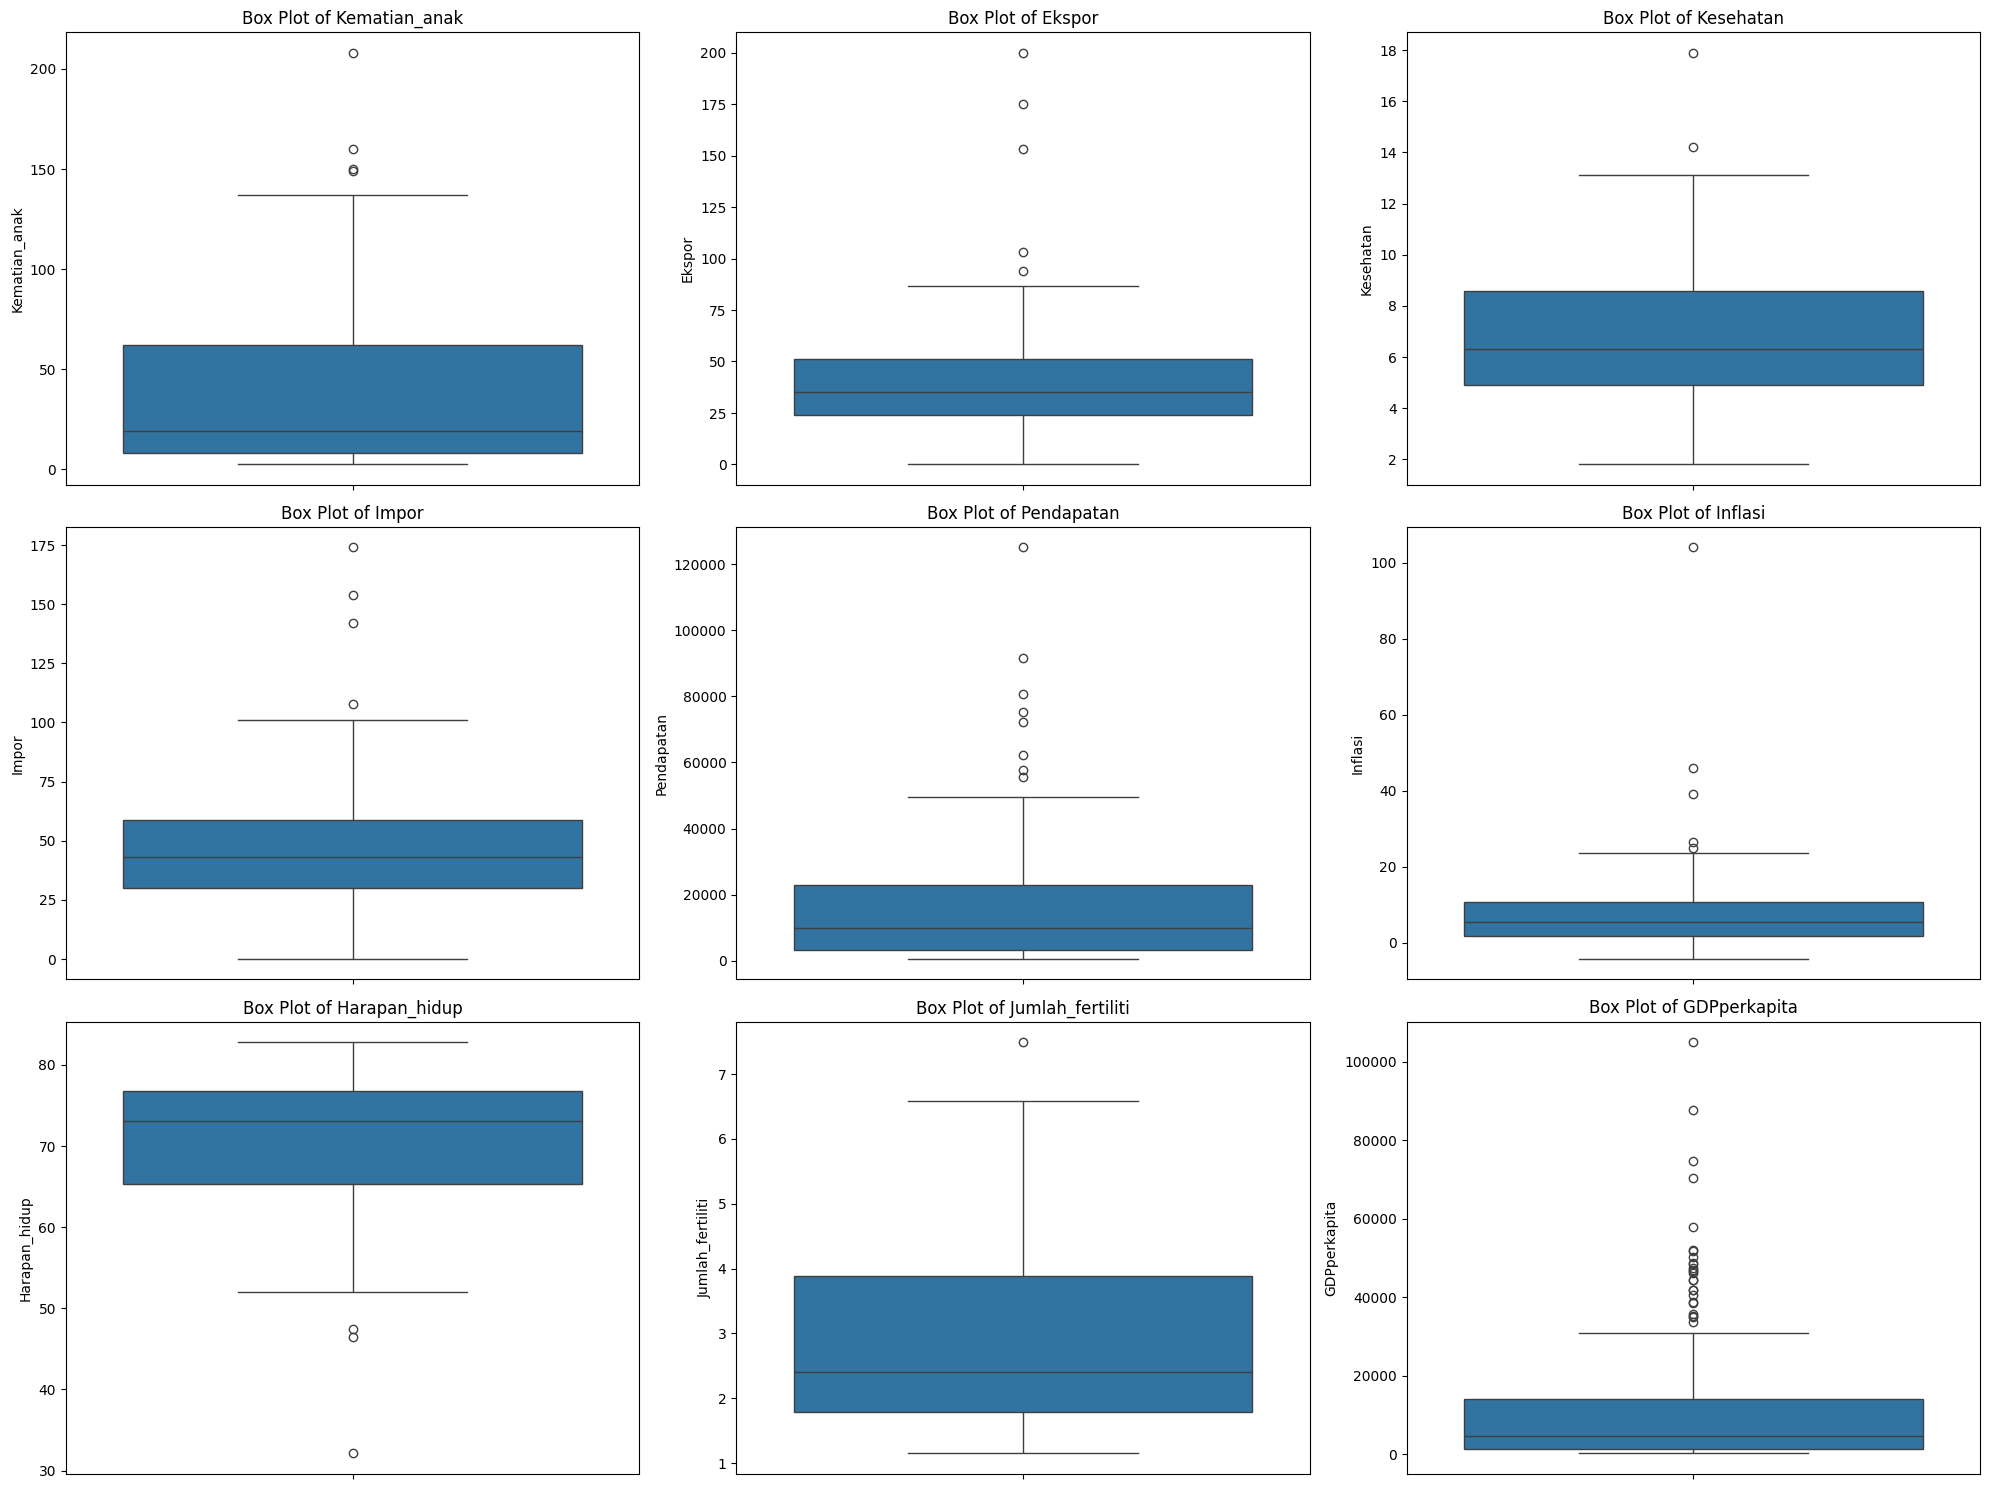

In [ ]:
columns = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi',
           'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

# Set ukuran plot
plt.figure(figsize=(20, 15))

# Buat box plot untuk setiap kolom
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Mengatur subplot grid 3x3
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [ ]:
# hapus outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to check for outliers
columns = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi',
           'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

# Remove outliers for each column
data_no_outliers = df.copy()
for col in columns:
    data_no_outliers = remove_outliers(data_no_outliers, col)

# Display the shape of the dataset before and after removing outliers
original_shape = df.shape
new_shape = data_no_outliers.shape
print(f"Original Shape: {original_shape}")
print(f"New Shape: {new_shape}")

Original Shape: (167, 10)
New Shape: (125, 10)


In [ ]:
data_no_outliers.to_csv('Data_Negara_HELP_Cleaned.csv', index=False)

In [ ]:
df2 = pd.read_csv('Data_Negara_HELP_Cleaned.csv')
# df.head()
df2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
120,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
121,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
122,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
123,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df2.describe(include='all')

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,125,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
unique,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.634400,37.439992,6.312160,45.272527,10649.448000,7.484360,69.421600,3.046720,5843.616000
std,NaN,33.933367,18.954847,2.217736,17.840654,9327.974819,6.145051,7.279684,1.468876,6135.677861
min,NaN,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,NaN,13.800000,22.800000,4.860000,31.400000,3060.000000,2.380000,64.000000,1.860000,1290.000000
50%,NaN,24.100000,33.200000,6.000000,43.700000,8430.000000,6.100000,71.300000,2.600000,3650.000000
75%,NaN,62.200000,50.500000,7.760000,58.100000,15400.000000,11.100000,75.500000,4.270000,8200.000000


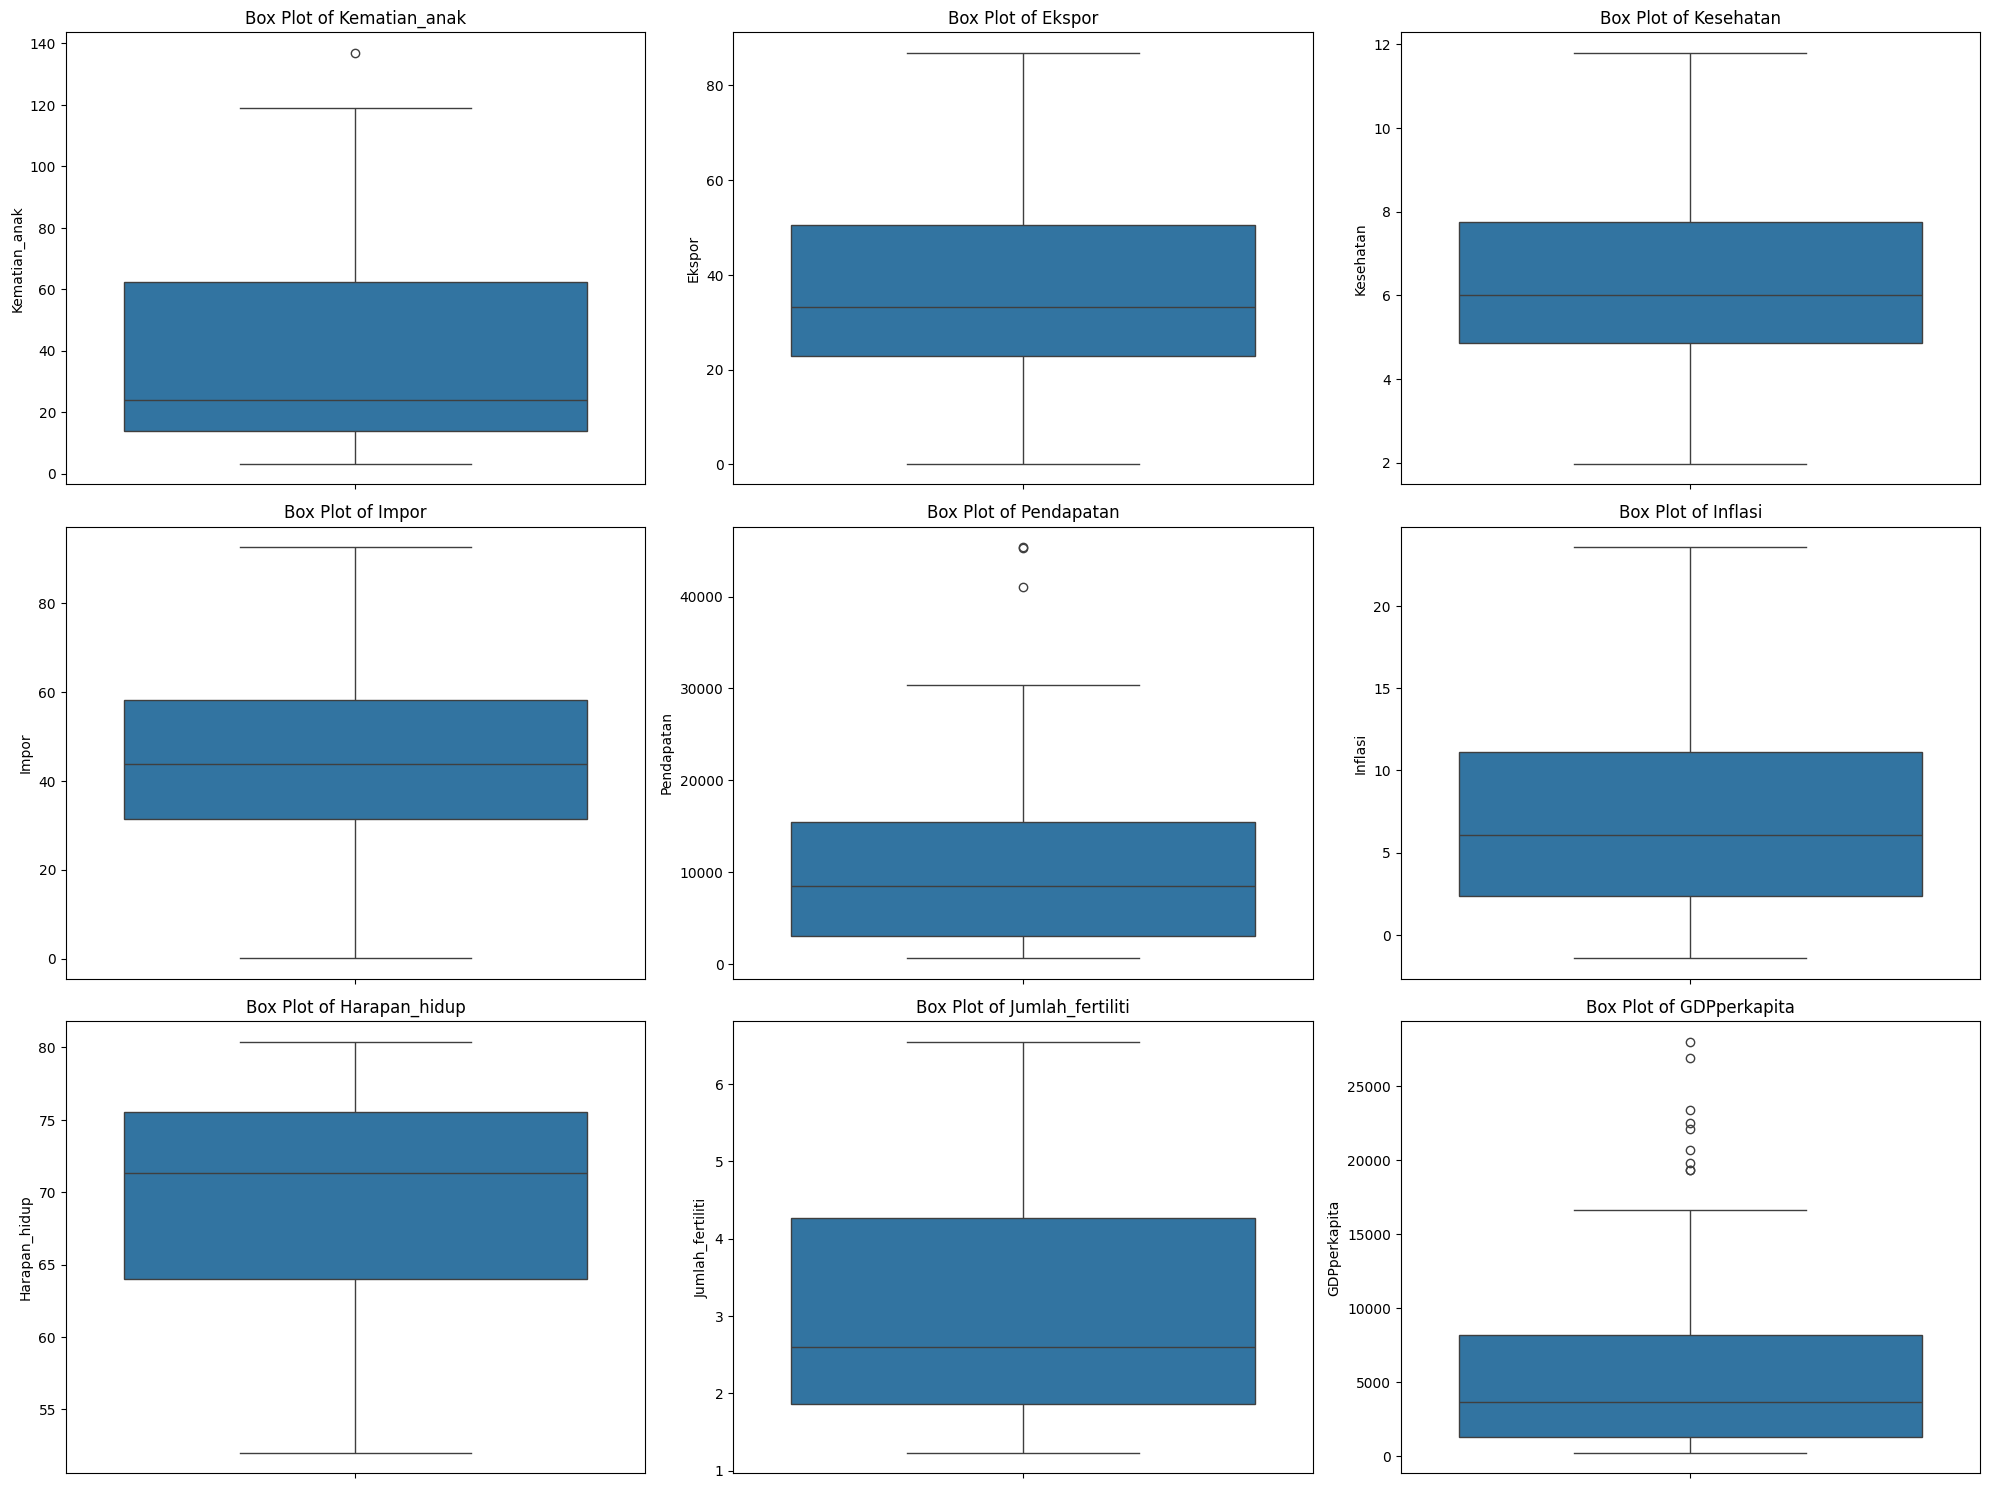

In [ ]:
# Set ukuran plot
plt.figure(figsize=(20, 15))

# Buat box plot untuk setiap kolom
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Mengatur subplot grid 3x3
    sns.boxplot(y=df2[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
df2.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [ ]:
'''
Scale Data menggunakan standard scaler
'''

kon_df = df2[['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']]

scaler = StandardScaler()
df2[kon_df.columns] = scaler.fit_transform(df2[kon_df.columns])
df2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741
1,Albania,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957
2,Algeria,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411
3,Angola,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593
4,Antigua and Barbuda,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140


In [ ]:
def check_values(df2):
    data = []
    for col in df2.columns:
        data.append([col, \
                  df2[col].dtype, \
                  df2[col].isna().sum(), \
                  round(100*(df2[col].isna().sum()/len(df2)), 2), \
                  df2[col].nunique(), \
                  df2[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)


check_values(df2)

,kolom,dataType,null,nullPercentage,unique,values
0,Negara,object,0,0.0,125,"[Afghanistan, Albania, Algeria, Angola, Antigu..."
1,Kematian_anak,float64,0,0.0,111,"[1.496140478705453, -0.6815443353325759, -0.36..."
2,Ekspor,float64,0,0.0,114,"[-1.4534759577192793, -0.5000293517965432, 0.0..."
3,Kesehatan,float64,0,0.0,113,"[0.5739827708682352, 0.10767609652897966, -0.9..."
4,Impor,float64,0,0.0,118,"[-0.02096483135478894, 0.187261241835891, -0.7..."
5,Pendapatan,float64,0,0.0,118,"[-0.9729683421885932, -0.07743837099908084, 0...."
6,Inflasi,float64,0,0.0,118,"[0.31952699510318366, -0.4892407871884237, 1.4..."
7,Harapan_hidup,float64,0,0.0,98,"[-1.823541414188607, 0.9486784703330094, 0.976..."
8,Jumlah_fertiliti,float64,0,0.0,112,"[1.8956258201895018, -0.9547029133643483, -0.1..."
9,GDPperkapita,float64,0,0.0,116,"[-0.865740739854175, -0.2869565308198741, -0.2..."


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

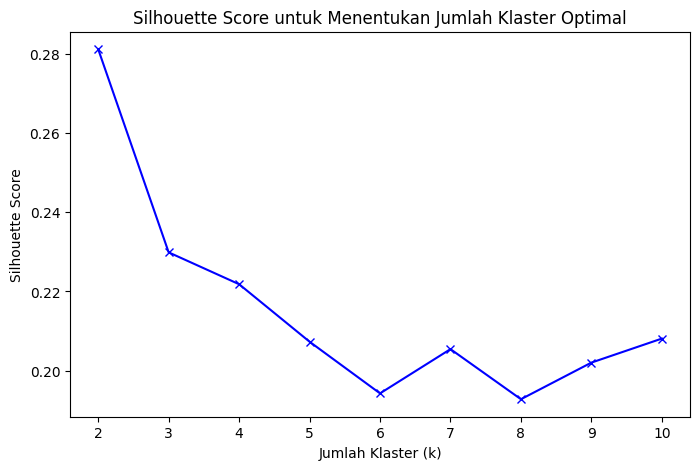

In [ ]:
'''
Cari nilai k menggunakan metode Silhouette Score dan visualisasikan
'''

# Menentukan Silhouette Score untuk berbagai jumlah klaster
silhouette_scores = []
K = range(2, 11)  # Rentang k yang diuji, mulai dari 2 hingga 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plot Silhouette Score vs. k
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.show()

In [ ]:
# Menentukan jumlah klaster optimal berdasarkan Silhouette Score
optimal_k = K[np.argmax(silhouette_scores)]
print(f'Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_k}')

# Menerapkan K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(data_scaled)

Jumlah klaster optimal berdasarkan Silhouette Score: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

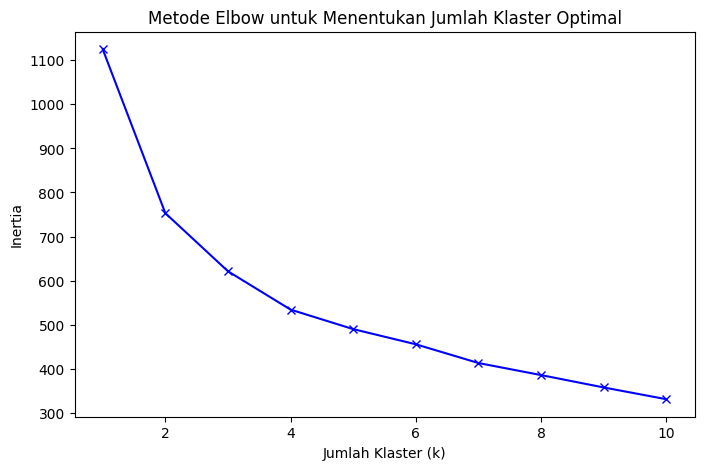

In [ ]:
# Menentukan inertia untuk berbagai jumlah klaster
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


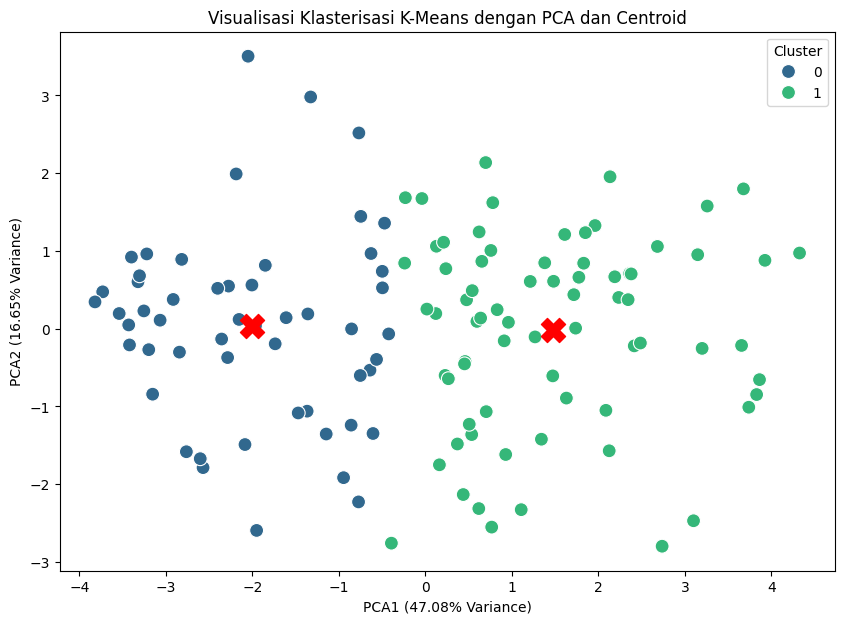

In [ ]:
from sklearn.decomposition import PCA

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[columns])

# Menentukan jumlah klaster optimal
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(data_scaled)

# Menggunakan PCA untuk mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
df2['PCA1'] = principal_components[:, 0]
df2['PCA2'] = principal_components[:, 1]

# Menghitung centroid dalam ruang fitur asli
centroids = kmeans.cluster_centers_

# Memproyeksikan centroid ke ruang PCA
centroids_pca = pca.transform(centroids)

# Visualisasi hasil PCA dengan centroid
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df2, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)

# Menambahkan centroid ke plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X')
plt.title('Visualisasi Klasterisasi K-Means dengan PCA dan Centroid')
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.show()


In [ ]:
cluster_summary = df2.groupby('Cluster')[columns].mean()
print(cluster_summary)

         Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
Cluster                                                                       
0             0.937316 -0.464851  -0.205302 -0.266816   -0.733974  0.314857   
1            -0.689969  0.342182   0.151125  0.196406    0.540287 -0.231769   

         Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                 
0            -0.945529          0.918820     -0.676962  
1             0.696014         -0.676353      0.498319  


In [ ]:
cluster_mod = df2.groupby('Cluster')[columns].median()
print(cluster_mod)

         Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
Cluster                                                                       
0             0.732767 -0.696016  -0.480866 -0.488067   -0.875020  0.213325   
1            -0.730365  0.117062   0.089567  0.232283    0.371403 -0.493325   

         Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                 
0            -0.996013          1.061717     -0.786050  
1             0.714212         -0.759896      0.149954  


In [ ]:
cluster_max = df2.groupby('Cluster')[columns].max()
print(cluster_max)

         Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
Cluster                                                                       
0             2.880864  2.524515   2.484482  2.663463    0.511330  2.633093   
1             0.661756  2.619860   2.439209  2.050040    3.740404  2.502383   

         Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                 
0             0.300448          2.394604      0.475592  
1             1.514156          0.883998      3.625605  


In [ ]:
cluster_min = df2.groupby('Cluster')[columns].min()
print(cluster_min)

         Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
Cluster                                                                       
0            -0.657874 -1.977395  -1.965804 -2.544108   -1.080712 -1.078252   
1            -1.078025 -1.416397  -1.725860 -1.883744   -0.845958 -1.456494   

         Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                 
0            -2.402811         -0.489901     -0.918432  
1            -0.568457         -1.241786     -0.812231  


In [ ]:
df2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster,PCA1,PCA2
0,Afghanistan,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741,0,-3.321839,0.602924
1,Albania,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957,1,0.960009,0.081622
2,Algeria,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411,1,0.162118,-1.751077
3,Angola,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593,0,-3.152670,-0.842848
4,Antigua and Barbuda,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140,1,2.234779,0.401336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Uzbekistan,-0.098659,-0.304043,-0.227340,-0.943913,-0.689886,1.473042,-0.085732,-0.483066,-0.730413,0,-0.858084,-1.240760
121,Vanuatu,-0.308734,0.485199,-0.480866,0.417998,-0.828736,-0.794775,-0.885676,0.309831,-0.470230,0,-0.628102,0.966600
122,Vietnam,-0.483304,1.830618,0.238966,1.965624,-0.662977,0.754138,0.507330,-0.749643,-0.741868,1,0.779152,1.620392
123,Yemen,0.493104,-0.394091,-0.512557,-0.611877,-0.664054,2.633093,-0.265030,1.109564,-0.741868,0,-2.085097,-1.490486


In [ ]:
# Menampilkan negara-negara dalam setiap klaster
cluster_0 = df2[df2['Cluster'] == 0]['Negara']
cluster_1 = df2[df2['Cluster'] == 1]['Negara']

print("Negara dalam Cluster 0:")
print(cluster_0.tolist())

print("\nNegara dalam Cluster 1:")
print(cluster_1.tolist())

Negara dalam Cluster 0:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Togo', 'Tonga', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']

Negara dalam Cluster 1:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'El Salvado

In [ ]:
print(cluster_0)

0           Afghanistan
3                Angola
10           Bangladesh
14                Benin
16              Bolivia
18             Botswana
21         Burkina Faso
22              Burundi
23             Cambodia
24             Cameroon
29              Comoros
30     Congo, Dem. Rep.
31          Congo, Rep.
33        Cote d'Ivoire
38                Egypt
40              Eritrea
43                Gabon
44               Gambia
46                Ghana
49            Guatemala
50               Guinea
51        Guinea-Bissau
54                India
55            Indonesia
57                 Iraq
61                Kenya
62             Kiribati
64                  Lao
67              Liberia
71           Madagascar
72               Malawi
75                 Mali
76           Mauritania
81           Mozambique
82              Myanmar
83              Namibia
84                Nepal
86             Pakistan
90          Philippines
95               Rwanda
98              Senegal
102     Solomon 

In [ ]:
print(len(cluster_0))

53


In [ ]:
print(len(cluster_1))

72


In [ ]:
cluster_1

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
115                 Turkey
116           Turkmenistan
118                Ukraine
119                Uruguay
122                Vietnam
Name: Negara, Length: 72, dtype: object